In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

##Loading the dataset


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import zipfile

speech_zip = "/content/drive/MyDrive/Voice-recogonization/Audio_Speech_Actors_01-24.zip"
song_zip = "/content/drive/MyDrive/Voice-recogonization/Audio_Song_Actors_01-24.zip"

with zipfile.ZipFile(speech_zip, 'r') as zip_ref:
    zip_ref.extractall("speech")

with zipfile.ZipFile(song_zip, 'r') as zip_ref:
    zip_ref.extractall("song")


In [8]:


emotion_map = {'01':'neutral','02':'calm','03':'happy','04':'sad','05':'angry','06':'fearful','07':'disgust','08':'surprised'}
data = []

for folder in ['speech', 'song']:
    for actor in os.listdir(folder):
        path = os.path.join(folder, actor)
        for f in os.listdir(path):
            if f.endswith('.wav'):
                emo = emotion_map.get(f.split('-')[2])
                if emo:
                    data.append({'emotion': emo, 'file_path': os.path.join(path, f)})

df = pd.DataFrame(data)


In [ ]:
df.head()

emotion                                 file_path
0      sad  speech/Actor_17/03-01-04-02-01-01-17.wav
1     calm  speech/Actor_17/03-01-02-01-02-02-17.wav
2     calm  speech/Actor_17/03-01-02-01-01-01-17.wav
3  neutral  speech/Actor_17/03-01-01-01-02-01-17.wav
4      sad  speech/Actor_17/03-01-04-01-01-01-17.wav

In [ ]:
df['emotion'].value_counts()

emotion
sad          376
calm         376
happy        376
fearful      376
angry        376
surprised    192
disgust      192
neutral      188
Name: count, dtype: int64

##Exploratory data analysis


<Axes: xlabel='count', ylabel='emotion'>

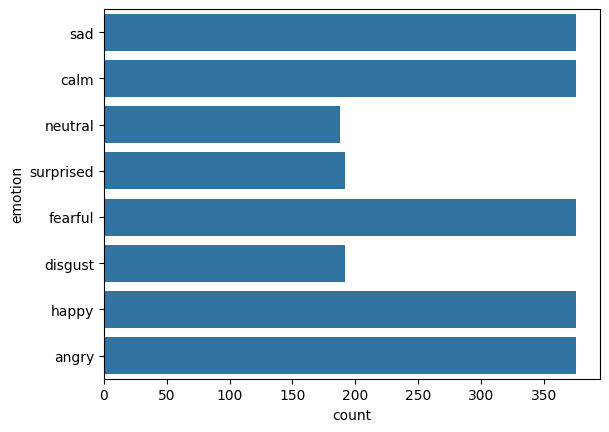

In [ ]:
sns.countplot(df['emotion'])

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

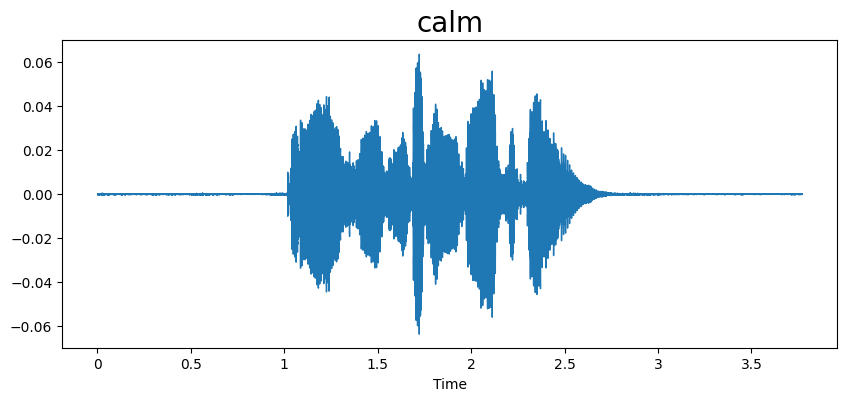

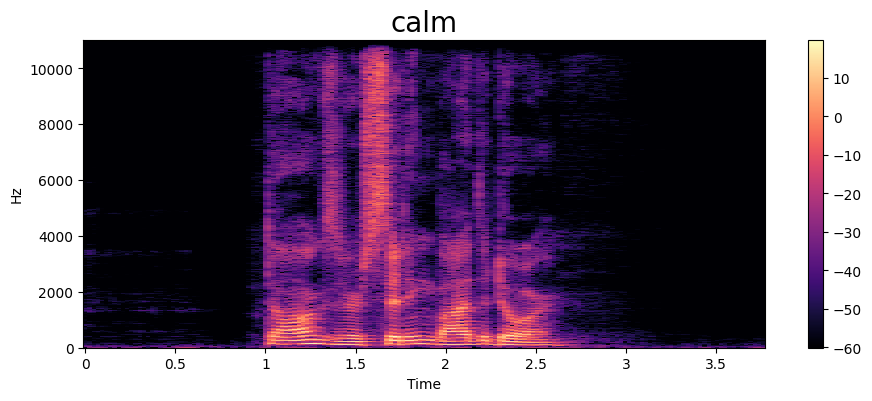

In [ ]:
emotion = 'calm'
path = np.array(df['file_path'])
file = path[np.where(df['emotion']==emotion)[0][0]]
data, sampling_rate = librosa.load(file)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(file)

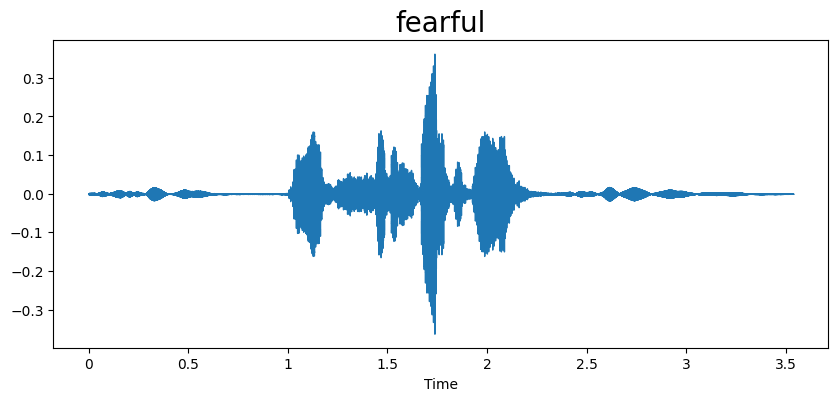

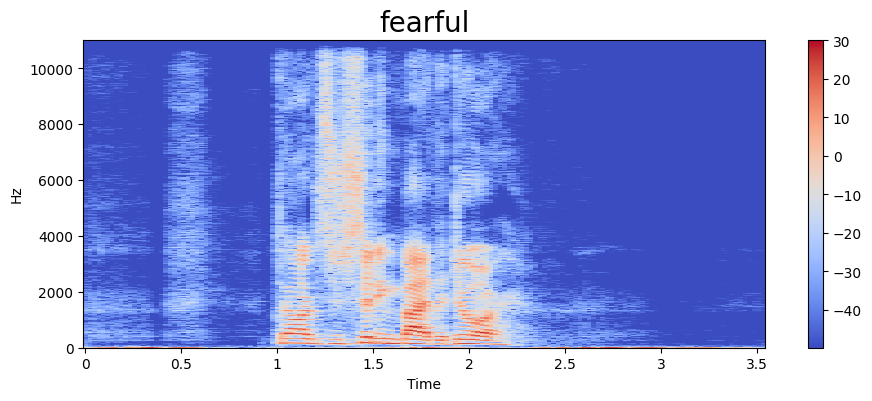

In [ ]:
emotion = 'fearful'
path = np.array(df['file_path'])
file = path[np.where(df['emotion']==emotion)[0][0]]
data, sampling_rate = librosa.load(file)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(file)

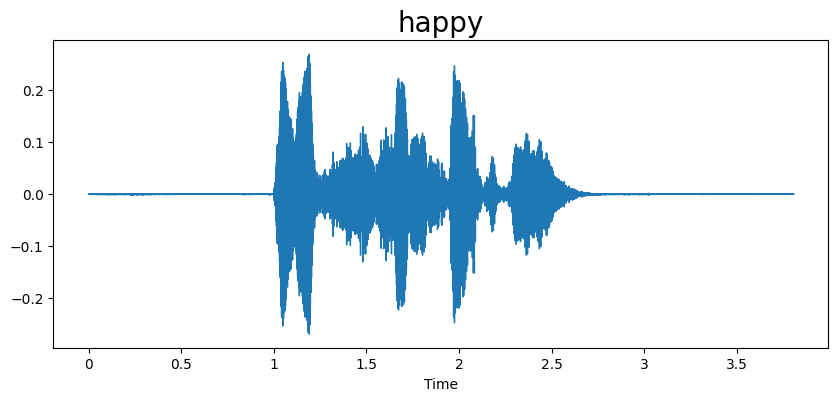

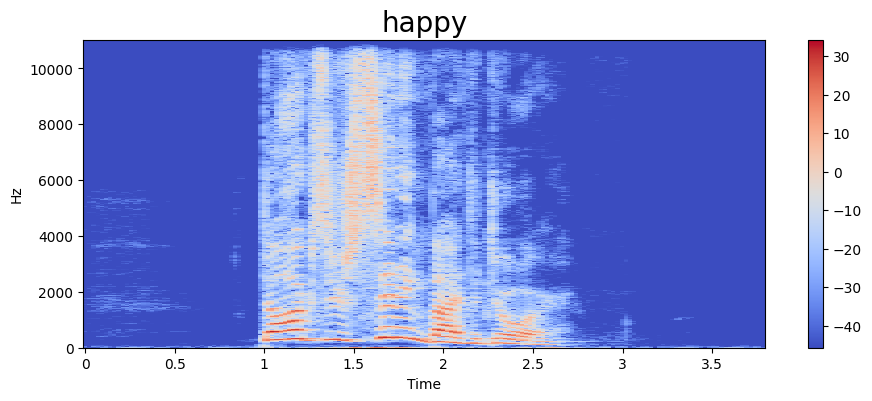

In [ ]:
emotion = 'happy'
path = np.array(df['file_path'])
file = path[np.where(df['emotion']==emotion)[0][0]]
data, sampling_rate = librosa.load(file)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(file)

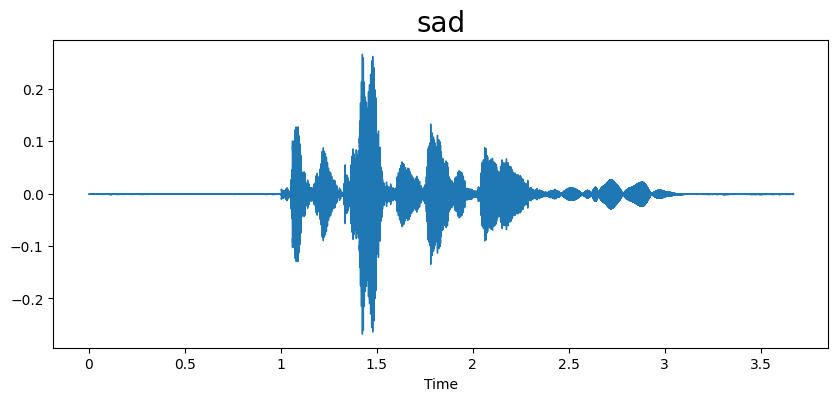

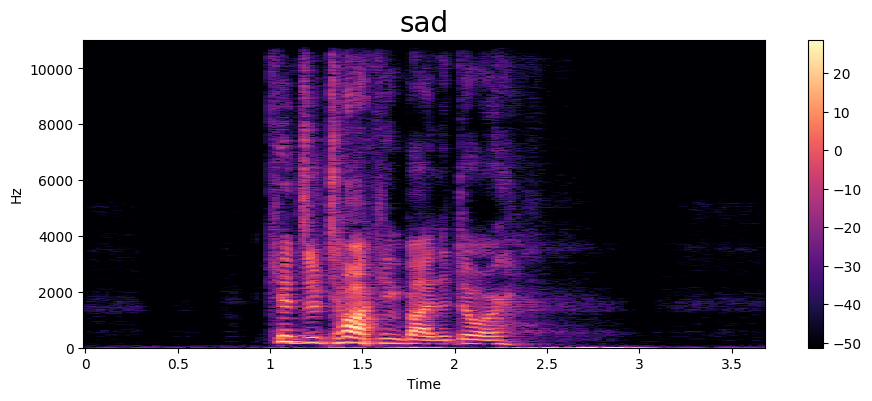

In [ ]:
emotion = 'sad'
path = np.array(df['file_path'])
file = path[np.where(df['emotion']==emotion)[0][0]]
data, sampling_rate = librosa.load(file)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(file)

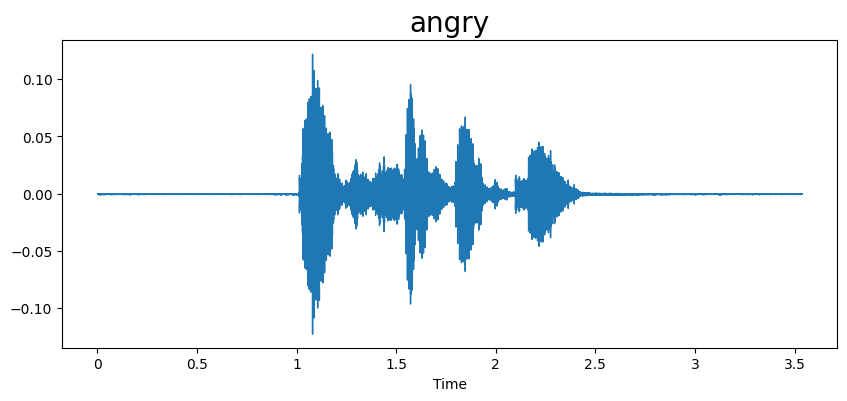

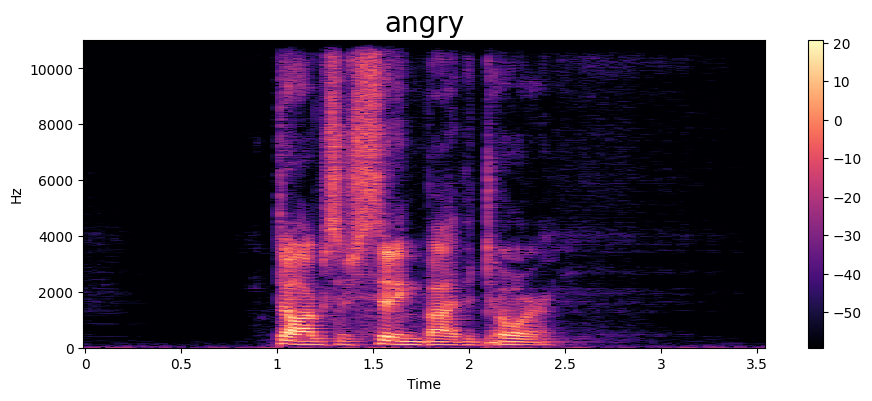

In [ ]:
emotion = 'angry'
path = np.array(df['file_path'])
file = path[np.where(df['emotion']==emotion)[0][0]]
data, sampling_rate = librosa.load(file)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(file)

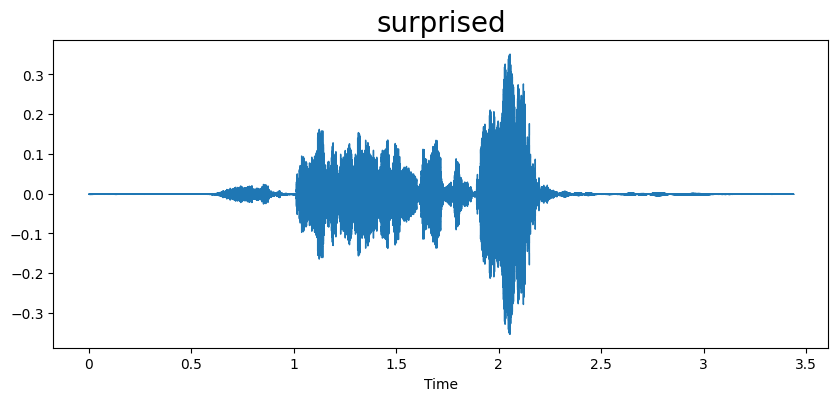

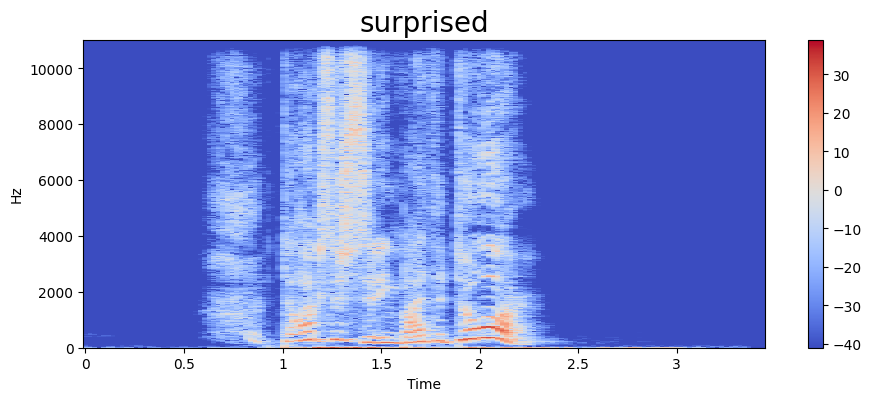

In [ ]:
emotion = 'surprised'
path = np.array(df['file_path'])
file = path[np.where(df['emotion']==emotion)[0][0]]
data, sampling_rate = librosa.load(file)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(file)

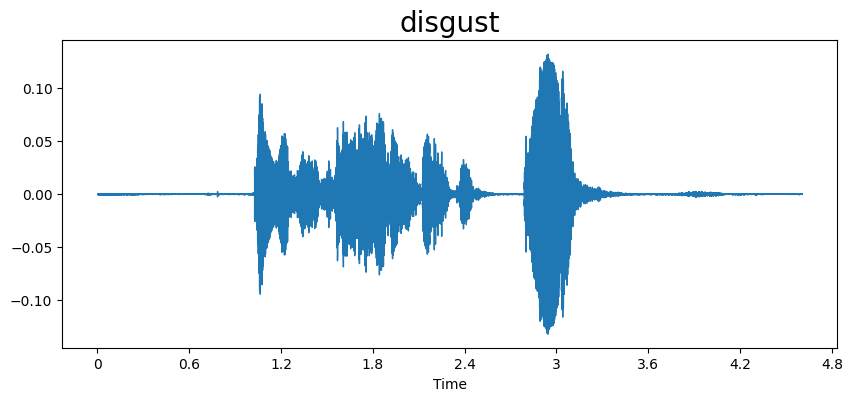

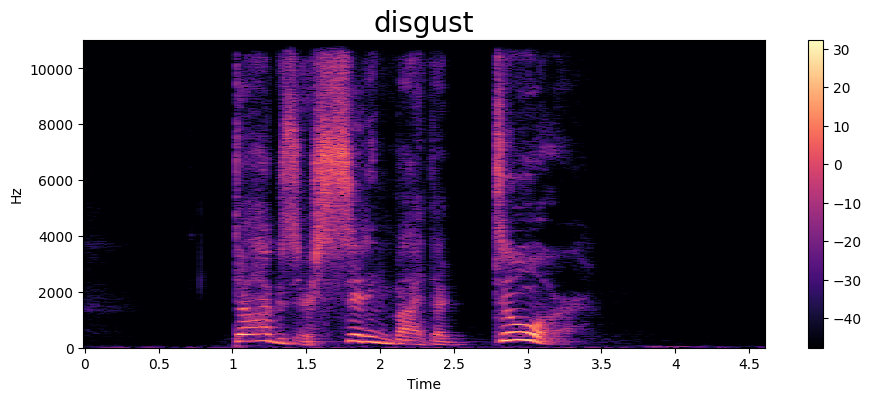

In [ ]:
emotion = 'disgust'
path = np.array(df['file_path'])
file = path[np.where(df['emotion']==emotion)[0][0]]
data, sampling_rate = librosa.load(file)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(file)

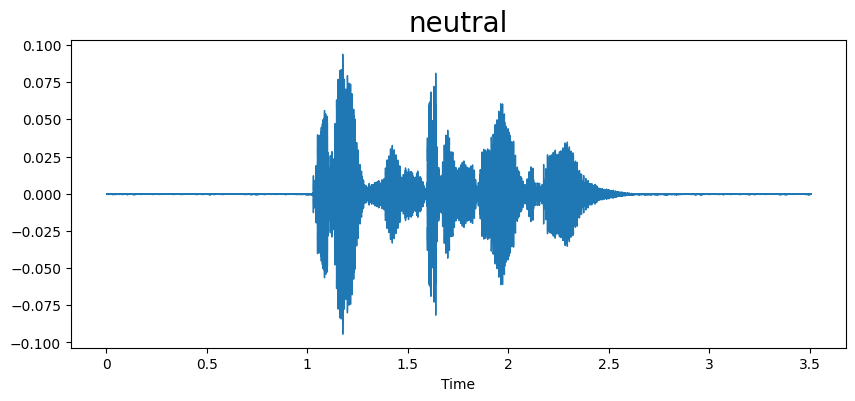

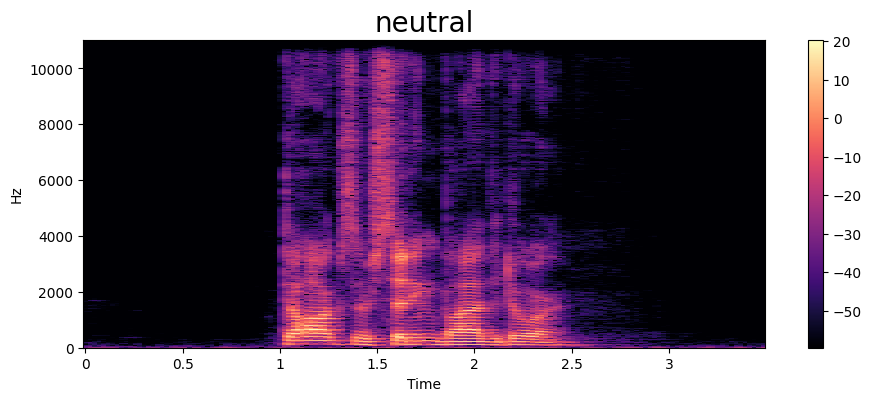

In [ ]:
emotion = 'neutral'
path = np.array(df['file_path'])
file = path[np.where(df['emotion']==emotion)[0][0]]
data, sampling_rate = librosa.load(file)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(file)

##Feature extraction

In [ ]:
def extract_mfcc(file_path):
  y,sr = librosa.load(file_path, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [ ]:
extract_mfcc(df['file_path'][0])

array([-5.0872656e+02,  6.7887573e+01, -9.6811581e+00,  1.0490335e+01,
        1.1848248e+01,  3.9766629e+00,  1.7688842e+00, -9.7900906e+00,
       -8.6962938e+00,  8.4819174e+00,  2.3592381e+00, -2.1030207e+00,
        6.7690649e+00,  9.4349355e-01,  1.8101248e+00,  4.4641299e+00,
       -1.1947250e+00,  1.5740768e+00, -1.2429640e-01,  2.0567458e+00,
       -4.7986281e-01,  2.5013258e+00, -2.5636885e+00,  3.7963083e+00,
        1.0779493e+00,  4.1766968e+00,  1.7591777e+00,  3.0320728e+00,
       -1.9355217e+00,  4.5086488e-01, -5.7039398e-01,  1.9987931e+00,
        2.8913858e+00,  3.3676012e+00,  1.1712613e+00,  1.1225852e+00,
        2.3898482e+00,  2.4142413e+00,  2.8083694e+00,  3.3283532e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['file_path'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-508.72656, 67.88757, -9.681158, 10.490335, 1...
1       [-591.316, 81.5294, 14.823229, 18.345507, 12.1...
2       [-625.35565, 72.01761, 5.088884, 15.516836, 13...
3       [-607.1226, 79.42583, 7.5434046, 17.779833, 12...
4       [-571.20685, 79.119064, -5.2158155, 13.035667,...
                              ...                        
2447    [-326.55252, 24.30955, -61.766594, 12.127126, ...
2448    [-494.89645, 40.475136, -50.855614, 13.322566,...
2449    [-555.9525, 43.581474, -17.026228, -4.3311987,...
2450    [-318.52182, 21.451294, -52.14503, 6.617195, -...
2451    [-486.53192, 41.271732, -52.203274, 7.1904497,...
Name: file_path, Length: 2452, dtype: object

In [ ]:
X = np.array(X_mfcc.tolist())
y = np.array(df['emotion'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

print("Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


Shapes:
X_train: (1961, 40)
X_test: (491, 40)


##ML Models



*   Random forest



Random Forest:

              precision    recall  f1-score   support

       angry       0.76      0.80      0.78        75
        calm       0.69      0.97      0.81        75
     disgust       0.72      0.54      0.62        39
     fearful       0.68      0.67      0.68        75
       happy       0.75      0.64      0.69        75
     neutral       0.92      0.58      0.71        38
         sad       0.65      0.67      0.66        75
   surprised       0.62      0.62      0.62        39

    accuracy                           0.71       491
   macro avg       0.72      0.68      0.69       491
weighted avg       0.72      0.71      0.70       491



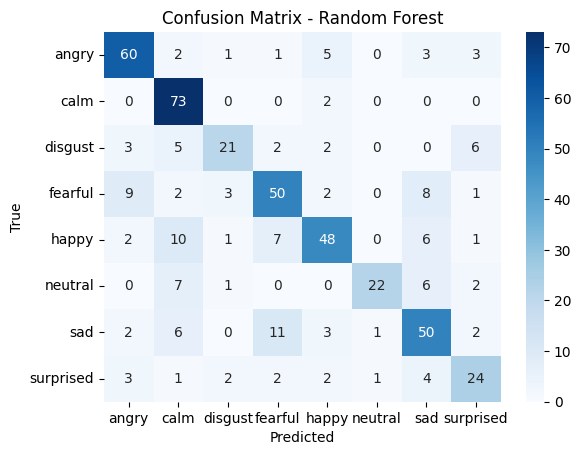

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:\n")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Highest overall accuracy: 71%

Most classes have f1-scores above 0.65, especially calm, angry, happy.

Handles class imbalance relatively well, though neutral and surprised still show weaker recall.






*   SVM



SVM:

              precision    recall  f1-score   support

       angry       0.52      0.57      0.54        75
        calm       0.28      0.63      0.39        75
     disgust       0.00      0.00      0.00        39
     fearful       0.23      0.23      0.23        75
       happy       0.27      0.27      0.27        75
     neutral       0.00      0.00      0.00        38
         sad       0.22      0.27      0.24        75
   surprised       0.00      0.00      0.00        39

    accuracy                           0.30       491
   macro avg       0.19      0.24      0.21       491
weighted avg       0.23      0.30      0.25       491



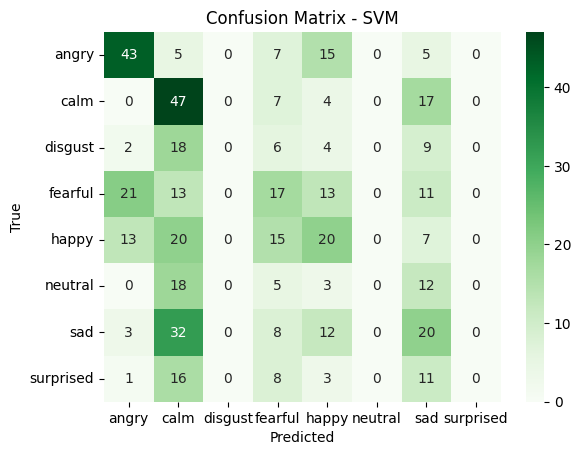

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM:\n")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greens')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

SVM performs poorly (accuracy: 30%):

Likely due to non-linear relationships in features that SVM with default settings isn't capturing well.

Completely fails to predict disgust, neutral, surprised → all 0 precision/recall.



*  KNN



KNN:

              precision    recall  f1-score   support

       angry       0.56      0.77      0.65        75
        calm       0.60      0.83      0.70        75
     disgust       0.39      0.31      0.34        39
     fearful       0.58      0.57      0.58        75
       happy       0.60      0.45      0.52        75
     neutral       0.53      0.47      0.50        38
         sad       0.63      0.45      0.53        75
   surprised       0.41      0.36      0.38        39

    accuracy                           0.56       491
   macro avg       0.54      0.53      0.52       491
weighted avg       0.56      0.56      0.55       491



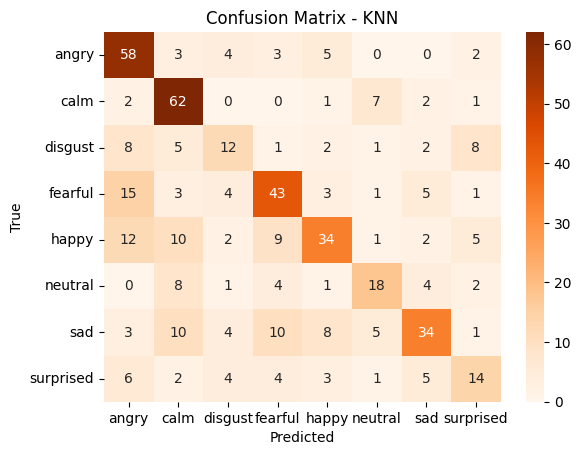

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN:\n")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Oranges')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

KNN does okay (56% accuracy), better than SVM but worse than RF:

Struggles with fine-grained emotion separation (e.g., happy vs surprised).

Better recall than SVM for most classes but still below evaluation criteria (75% per-class accuracy).

##DL Models

In [ ]:
def extract_full_mfcc(file_path, max_pad_len=173):
    y, sr = librosa.load(file_path, duration=4, offset=0.5)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    if mfcc.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]
    return mfcc.T


In [ ]:
X = np.array([extract_full_mfcc(f) for f in df['file_path']])
print(X.shape)

(2452, 173, 40)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y_encoded = le.fit_transform(df['emotion'])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [ ]:
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

1. CNN



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()

model.add(Conv1D(128, 5, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(256, 5, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(512, 5, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 169, 128)       │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 169, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 84, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 84, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 80, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 80, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 40, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 40, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 36, 512)        │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 36, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 18, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 18, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,242,760 (12.37 MB)

 Trainable params: 3,240,968 (12.36 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 31s 510ms/step - accuracy: 0.3056 - loss: 1.9381 - val_accuracy: 0.2974 - val_loss: 1.7525 - learning_rate: 0.0010
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 31s 349ms/step - accuracy: 0.4098 - loss: 1.6096 - val_accuracy: 0.4460 - val_loss: 1.4117 - learning_rate: 0.0010
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 376ms/step - accuracy: 0.4516 - loss: 1.4944 - val_accuracy: 0.4827 - val_loss: 1.3095 - learning_rate: 0.0010
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 38s 321ms/step - accuracy: 0.4754 - loss: 1.4207 - val_accuracy: 0.5642 - val_loss: 1.2372 - learning_rate: 0.0010
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 324ms/step - accuracy: 0.5053 - loss: 1.3644 - val_accuracy: 0.5703 - val_loss: 1.2287 - learning_rate: 0.0010
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 346ms/step - accuracy: 0.5053 - loss: 1.3670 - val_accuracy: 0.4705 - val_loss: 1.4649 - learning_rate: 0.0010
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 32s 510ms/step - accuracy: 0.5436 - loss: 1.

62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step
🔍 Training Classification Report:
              precision    recall  f1-score   support

       angry       0.98      0.99      0.99       301
        calm       0.83      0.96      0.89       301
     disgust       0.93      0.93      0.93       153
     fearful       0.92      0.94      0.93       301
       happy       0.95      0.88      0.92       301
     neutral       0.94      0.63      0.75       150
         sad       0.83      0.87      0.85       301
   surprised       0.88      0.89      0.89       153

    accuracy                           0.90      1961
   macro avg       0.91      0.89      0.89      1961
weighted avg       0.91      0.90      0.90      1961



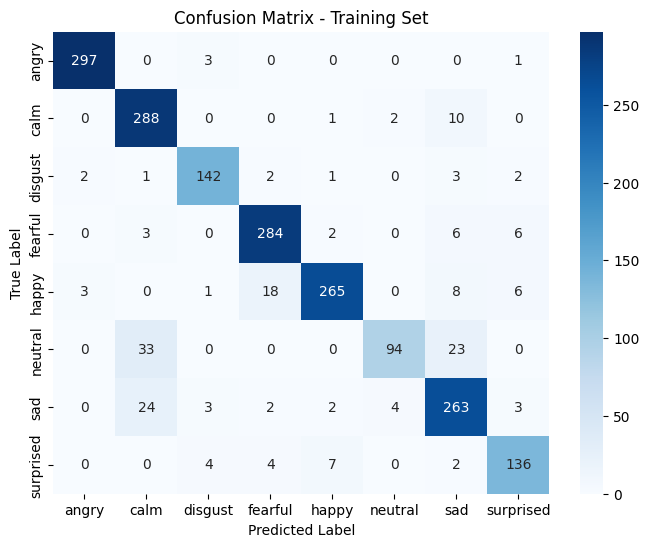

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_train_pred = model.predict(X_train)
y_train_pred_labels = np.argmax(y_train_pred, axis=1)
y_train_true = np.argmax(y_train_onehot, axis=1)

print("Training Classification Report:")
print(classification_report(y_train_true, y_train_pred_labels, target_names=le.classes_))

cm_train = confusion_matrix(y_train_true, y_train_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step 
🔍 Test Classification Report:
              precision    recall  f1-score   support

       angry       0.88      0.92      0.90        75
        calm       0.73      0.93      0.82        75
     disgust       0.76      0.79      0.78        39
     fearful       0.73      0.77      0.75        75
       happy       0.81      0.64      0.72        75
     neutral       0.91      0.53      0.67        38
         sad       0.64      0.73      0.68        75
   surprised       0.80      0.62      0.70        39

    accuracy                           0.76       491
   macro avg       0.78      0.74      0.75       491
weighted avg       0.77      0.76      0.76       491



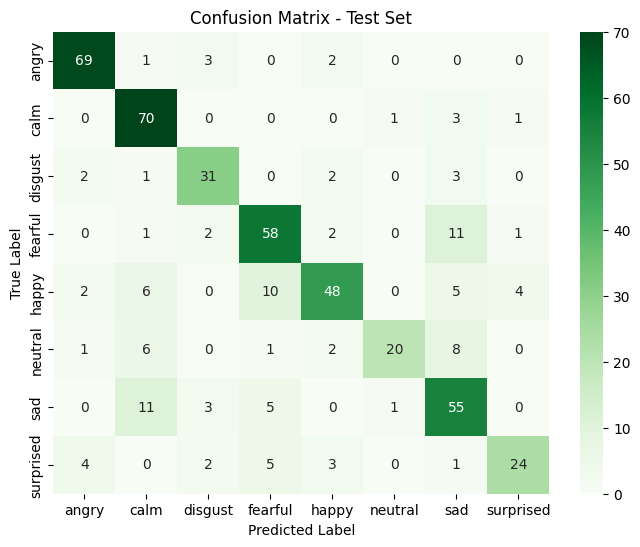

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_true = np.argmax(y_test_onehot, axis=1)

print("Test Classification Report:")
print(classification_report(y_test_true, y_test_pred_labels, target_names=le.classes_))

cm_test = confusion_matrix(y_test_true, y_test_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


2. LSTM

In [ ]:
def extract_mfcc_lstm(file_path, max_pad_len=173):
    audio, sample_rate = librosa.load(file_path, duration=4, offset=0.5)
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    if mfcc.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]

    return mfcc.T


In [ ]:
X = np.array([extract_mfcc_lstm(fp) for fp in df['file_path']])

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y_encoded = le.fit_transform(df['emotion'])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [ ]:
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

model_lstm = Sequential()

model_lstm.add(LSTM(128, return_sequences=True, input_shape=(173, 40)))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.3))

model_lstm.add(LSTM(64))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.3))

model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.3))

model_lstm.add(Dense(y_train_onehot.shape[1], activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 169, 128)       │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 169, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 84, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 84, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 80, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 80, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 40, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 40, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 36, 512)        │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 36, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 18, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 18, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,724,698 (37.10 MB)

 Trainable params: 3,240,968 (12.36 MB)

 Non-trainable params: 1,792 (7.00 KB)

 Optimizer params: 6,481,938 (24.73 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

history_lstm = model_lstm.fit(
    X_train, y_train_onehot,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test_onehot),
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 551ms/step - accuracy: 0.1322 - loss: 2.5101 - val_accuracy: 0.2607 - val_loss: 1.9715 - learning_rate: 0.0010
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 404ms/step - accuracy: 0.1995 - loss: 2.1002 - val_accuracy: 0.2872 - val_loss: 1.8906 - learning_rate: 0.0010
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 407ms/step - accuracy: 0.2717 - loss: 1.9364 - val_accuracy: 0.2974 - val_loss: 1.7981 - learning_rate: 0.0010
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 410ms/step - accuracy: 0.2891 - loss: 1.8358 - val_accuracy: 0.3666 - val_loss: 1.6900 - learning_rate: 0.0010
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 405ms/step - accuracy: 0.3387 - loss: 1.7012 - val_accuracy: 0.3360 - val_loss: 1.6549 - learning_rate: 0.0010
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 385ms/step - accuracy: 0.3284 - loss: 1.6995 - val_accuracy: 0.3992 - val_loss: 1.5696 - learning_rate: 0.0010
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 42s 402ms/step - accuracy: 0.3779 - loss: 1.

62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step
📊 LSTM Train Classification Report:
              precision    recall  f1-score   support

       angry       0.90      0.88      0.89       301
        calm       0.79      0.91      0.84       301
     disgust       0.75      0.75      0.75       153
     fearful       0.75      0.68      0.72       301
       happy       0.81      0.66      0.73       301
     neutral       0.53      0.73      0.61       150
         sad       0.75      0.44      0.56       301
   surprised       0.53      0.91      0.67       153

    accuracy                           0.73      1961
   macro avg       0.73      0.75      0.72      1961
weighted avg       0.75      0.73      0.73      1961



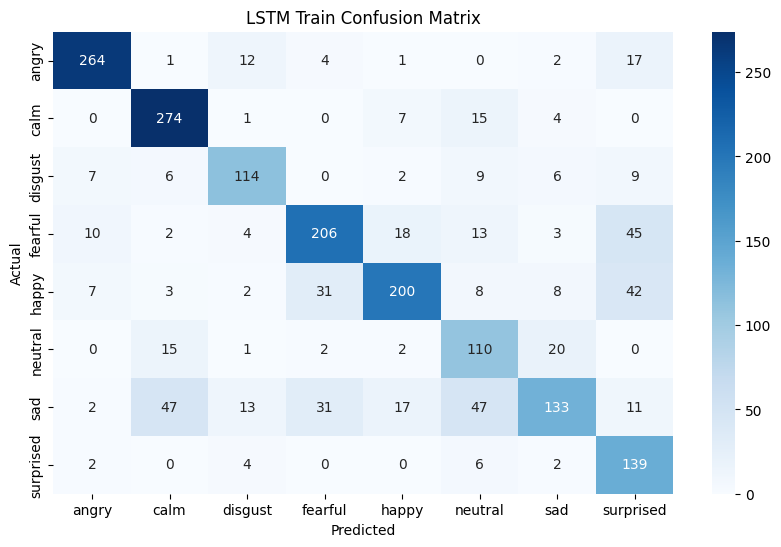

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_train_pred_probs = model_lstm.predict(X_train)
y_train_preds = np.argmax(y_train_pred_probs, axis=1)
y_train_true = np.argmax(y_train_onehot, axis=1)

print("LSTM Train Classification Report:")
print(classification_report(y_train_true, y_train_preds, target_names=le.classes_))

cm_train = confusion_matrix(y_train_true, y_train_preds)
plt.figure(figsize=(10,6))
sns.heatmap(cm_train, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("LSTM Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step
📊 LSTM Test Classification Report:
              precision    recall  f1-score   support

       angry       0.83      0.76      0.79        75
        calm       0.68      0.79      0.73        75
     disgust       0.61      0.64      0.62        39
     fearful       0.56      0.49      0.52        75
       happy       0.76      0.59      0.66        75
     neutral       0.37      0.50      0.43        38
         sad       0.57      0.37      0.45        75
   surprised       0.49      0.87      0.62        39

    accuracy                           0.62       491
   macro avg       0.61      0.63      0.60       491
weighted avg       0.63      0.62      0.61       491



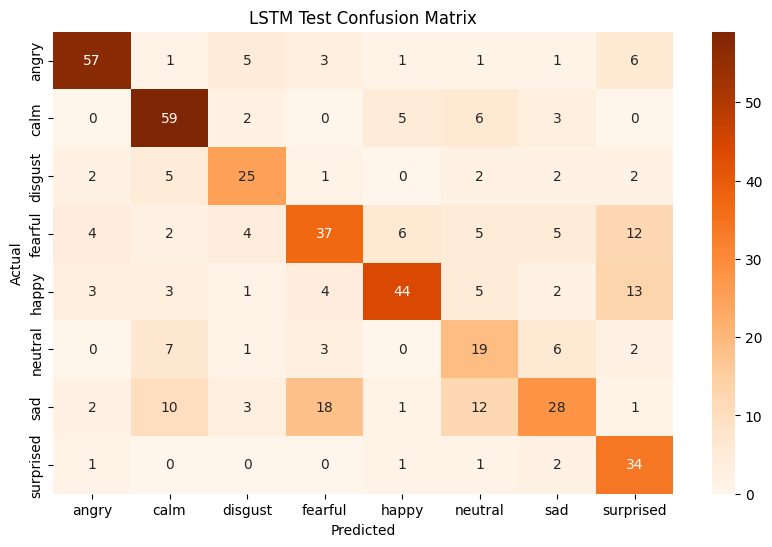

In [ ]:
y_test_pred_probs = model_lstm.predict(X_test)
y_test_preds = np.argmax(y_test_pred_probs, axis=1)
y_test_true = np.argmax(y_test_onehot, axis=1)

print("LSTM Test Classification Report:")
print(classification_report(y_test_true, y_test_preds, target_names=le.classes_))

cm_test = confusion_matrix(y_test_true, y_test_preds)
plt.figure(figsize=(10,6))
sns.heatmap(cm_test, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Oranges')
plt.title("LSTM Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


3. CNN+LSTM Hybrid Model

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (1961, 173, 40)
X_test shape: (491, 173, 40)


In [ ]:
X_train_cnnlstm = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test_cnnlstm = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

print("X_train_cnnlstm shape:", X_train_cnnlstm.shape)
print("X_test_cnnlstm shape:", X_test_cnnlstm.shape)


X_train_cnnlstm shape: (1961, 173, 40, 1)
X_test_cnnlstm shape: (491, 173, 40, 1)


In [ ]:
# Downsample to 100 time steps
X_train_small = X_train[:, :100, :]
X_test_small = X_test[:, :100, :]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(100, 40)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

history = model.fit(
    X_train_small, y_train_onehot,
    validation_data=(X_test_small, y_test_onehot),
    epochs=30,
    batch_size=16,  # Keep this small
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.2031 - loss: 2.0094 - val_accuracy: 0.2688 - val_loss: 1.8018 - learning_rate: 0.0010
Epoch 2/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.3481 - loss: 1.6456 - val_accuracy: 0.4745 - val_loss: 1.4274 - learning_rate: 0.0010
Epoch 3/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.4872 - loss: 1.3568 - val_accuracy: 0.5234 - val_loss: 1.2647 - learning_rate: 0.0010
Epoch 4/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.5401 - loss: 1.2379 - val_accuracy: 0.5743 - val_loss: 1.1829 - learning_rate: 0.0010
Epoch 5/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5880 - loss: 1.0796 - val_accuracy: 0.6151 - val_loss: 1.1372 - learning_rate: 0.0010
Epoch 6/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.6004 - loss: 1.0813 - val_accuracy: 0.6151 - val_loss: 1.1169 - learning_rate: 0.0010
Epoch 7/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.6492 - loss: 

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
📊 Train Classification Report:

              precision    recall  f1-score   support

       angry       0.93      0.96      0.94       301
        calm       0.83      0.97      0.89       301
     disgust       0.82      0.87      0.84       153
     fearful       0.95      0.77      0.85       301
       happy       0.96      0.82      0.89       301
     neutral       0.79      0.78      0.79       150
         sad       0.79      0.80      0.80       301
   surprised       0.76      0.92      0.83       153

    accuracy                           0.86      1961
   macro avg       0.85      0.86      0.85      1961
weighted avg       0.87      0.86      0.86      1961



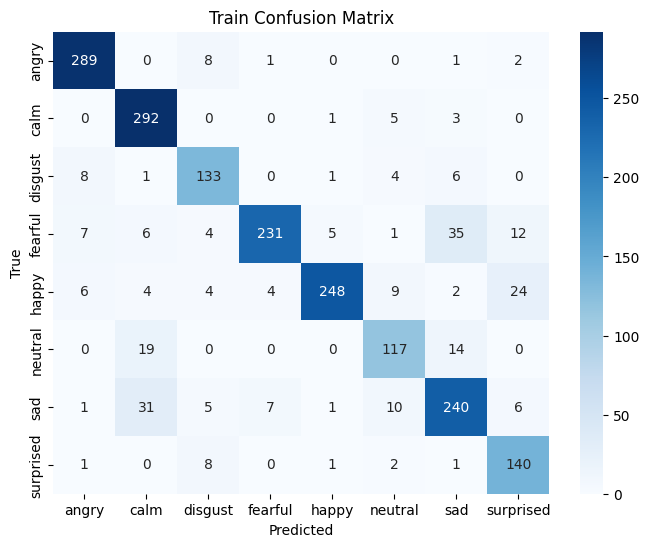

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_train_pred = model.predict(X_train_small)
y_train_pred_labels = np.argmax(y_train_pred, axis=1)
y_train_true_labels = np.argmax(y_train_onehot, axis=1)

print("Train Classification Report:\n")
print(classification_report(y_train_true_labels, y_train_pred_labels, target_names=le.classes_))

cm_train = confusion_matrix(y_train_true_labels, y_train_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
📊 Test Classification Report:

              precision    recall  f1-score   support

       angry       0.75      0.87      0.80        75
        calm       0.77      0.89      0.83        75
     disgust       0.53      0.51      0.52        39
     fearful       0.76      0.55      0.64        75
       happy       0.81      0.68      0.74        75
     neutral       0.74      0.76      0.75        38
         sad       0.64      0.65      0.64        75
   surprised       0.72      0.85      0.78        39

    accuracy                           0.72       491
   macro avg       0.71      0.72      0.71       491
weighted avg       0.72      0.72      0.72       491



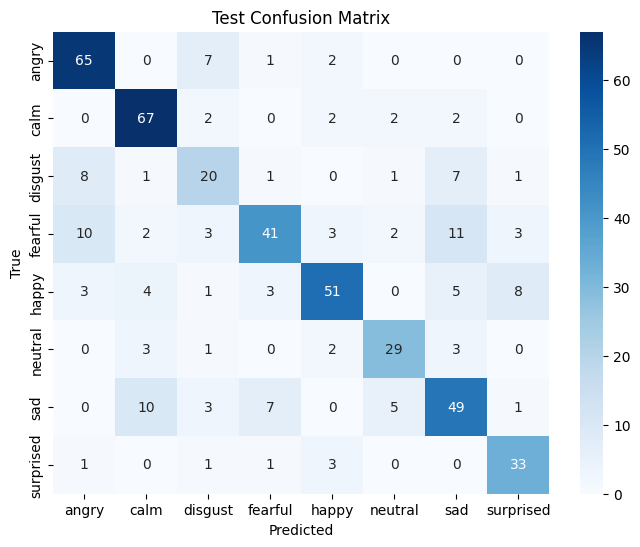

In [ ]:

y_test_pred = model.predict(X_test_small)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_true_labels = np.argmax(y_test_onehot, axis=1)

print("Test Classification Report:\n")
print(classification_report(y_test_true_labels, y_test_pred_labels, target_names=le.classes_))

cm_test = confusion_matrix(y_test_true_labels, y_test_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


1. Selected Model: CNN
Achieved highest test accuracy (76%) and balanced F1-scores across most classes.

2. Dropped Emotion: Disgust
Consistently low performance across models and limited data (only 192 samples), making it hard to classify accurately.

##Retraining selected model

In [9]:
df_filtered = df[df['emotion'] != 'disgust'].reset_index(drop=True)
print("Remaining classes:", df_filtered['emotion'].unique())


Remaining classes: ['sad' 'calm' 'neutral' 'surprised' 'fearful' 'happy' 'angry']


In [10]:
import librosa
import numpy as np

def extract_mfcc(file_path, max_pad_len=173):
    audio, sample_rate = librosa.load(file_path, duration=4, offset=0.5)
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    if mfcc.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]
    return mfcc.T

X = np.array([extract_mfcc(fp) for fp in df_filtered['file_path']])
y = df_filtered['emotion'].values
print("X shape:", X.shape)


X shape: (2260, 173, 40)


In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_onehot = to_categorical(y_encoded)
print("Classes:", le.classes_)

Classes: ['angry' 'calm' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, stratify=y_encoded, random_state=42
)


In [13]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)

class_weights_dict = {i: w for i, w in enumerate(class_weights)}


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(173, 40)),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Conv1D(256, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Conv1D(512, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])





In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights_dict)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 382ms/step - accuracy: 0.2592 - loss: 2.3323 - val_accuracy: 0.2257 - val_loss: 8.3723 - learning_rate: 0.0010
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 38s 336ms/step - accuracy: 0.4368 - loss: 1.5788 - val_accuracy: 0.4137 - val_loss: 2.2158 - learning_rate: 0.0010
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 358ms/step - accuracy: 0.5353 - loss: 1.2358 - val_accuracy: 0.5442 - val_loss: 1.1467 - learning_rate: 0.0010
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 344ms/step - accuracy: 0.6076 - loss: 1.0633 - val_accuracy: 0.5752 - val_loss: 1.0314 - learning_rate: 0.0010
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 360ms/step - accuracy: 0.6281 - loss: 0.9876 - val_accuracy: 0.6217 - val_loss: 1.0347 - learning_rate: 0.0010
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 336ms/step - accuracy: 0.6820 - loss: 0.8532 - val_accuracy: 0.6283 - val_loss: 0.9527 - learning_rate: 0.0010
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 362ms/step - accuracy: 0.6901 - loss: 0.

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
 Test Classification Report:

              precision    recall  f1-score   support

       angry       0.99      0.89      0.94        75
        calm       0.83      0.93      0.88        75
     fearful       0.66      0.89      0.76        75
       happy       0.95      0.75      0.84        75
     neutral       0.94      0.76      0.84        38
         sad       0.75      0.79      0.77        75
   surprised       0.90      0.69      0.78        39

    accuracy                           0.83       452
   macro avg       0.86      0.82      0.83       452
weighted avg       0.85      0.83      0.83       452



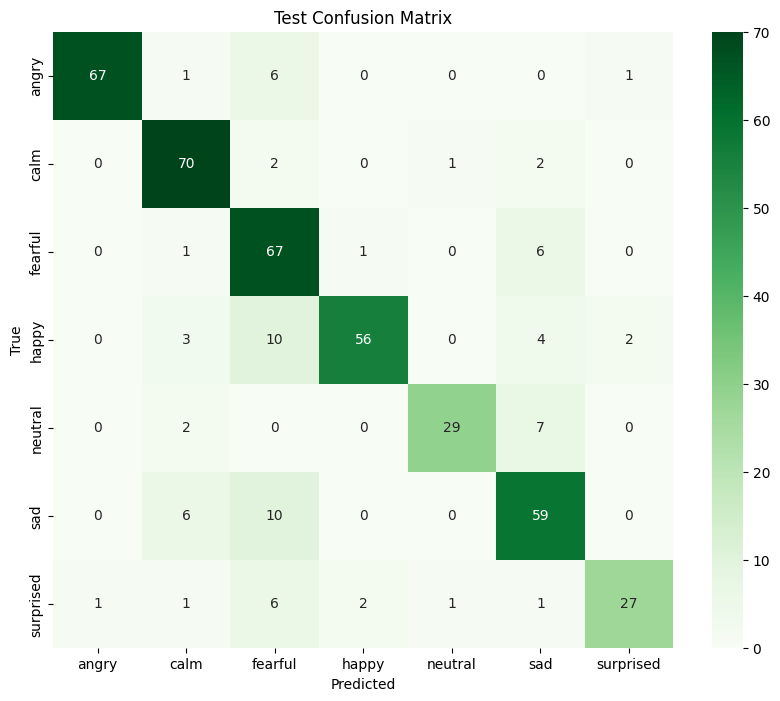

In [24]:
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_true_labels = np.argmax(y_test, axis=1)

print(" Test Classification Report:\n")
print(classification_report(y_test_true_labels, y_test_pred_labels, target_names=le.classes_))

cm_test = confusion_matrix(y_test_true_labels, y_test_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [26]:
model.save("final_model.keras")

